# Firts look into the covariates dataframe

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import sklearn as sk

In [2]:
#importing Covariates dataframe 

Covariates = pd.read_csv("../../data/cleaned_data/Covariates.csv")

In [3]:
Covariates.head()

,MunicipalityNumber,MunicipalityName,urban_typo,mountain_type,mountain_binary,Population,language,Canton,Yes [nbr],No [nbr],...,PES,Small right-wing parties,Municipal_rev [CHF],revenue_per_capita [CHF],elec_consumption_households_mwh_per_year_per_capita,elec_consumption_households_mwh_per_year,elec_consumption_mwh_per_year_per_capita,elec_consumption_mwh_per_year,mean_price (cts/kWh),std_price (cts/kWh)
0,1.0,Aeugst am Albis,Low-density peri-urban municipality (23),Moyen-pays - Rhin supérieur (1),Communes hors des régions de montagne,1998.0,german,Zürich,444.0,335.0,...,298.149915,75.687016,109921000.0,NaN,2.9119,5811,4.4623,8905,26.231762,2.464933
1,2.0,Affoltern am Albis,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),Communes hors des régions de montagne,12859.0,german,Zürich,1884.0,1260.0,...,1549.017114,191.375321,435719400.0,80080.757214,1.6492,21056,4.1840,53420,26.231762,2.464933
2,3.0,Bonstetten,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),Communes hors des régions de montagne,5678.0,german,Zürich,1197.0,706.0,...,689.174556,77.173402,251102000.0,99960.987261,1.7356,9827,2.8006,15857,26.231762,2.464933
3,4.0,Hausen am Albis,Medium-density peri-urban municipality (22),Moyen-pays - Rhin supérieur (1),Communes hors des régions de montagne,3974.0,german,Zürich,764.0,555.0,...,628.072197,60.419112,165486900.0,100968.212325,2.3004,9128,3.9176,15545,26.231762,2.464933
4,5.0,Hedingen,Urban municipality in a large agglomeration (11),Moyen-pays - Rhin supérieur (1),Communes hors des régions de montagne,3963.0,german,Zürich,809.0,580.0,...,466.535182,82.008137,177331200.0,106826.024096,2.1157,8335,5.3155,20941,26.231762,2.464933


In [7]:
Covariates=Covariates.fillna(0)
Covariates.isna().sum()

MunicipalityNumber                                     0
MunicipalityName                                       0
urban_typo                                             0
mountain_type                                          0
mountain_binary                                        0
Population                                             0
language                                               0
Canton                                                 0
Yes [nbr]                                              0
No [nbr]                                               0
0-19 years                                             0
20-64 years                                            0
65 years or older                                      0
Private households                                     0
Housing and infrastructure area (%)                    0
Total employment                                       0
Primary sector                                         0
Secondary sector               

In [8]:
df = Covariates.copy()

# Compute statistics by typology
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std']).reset_index()
grouped_df['std'].values

array([ 1299.89427175,  3016.88652979,   578.18388563,  1651.06705576,
         711.93497829,  2768.55589514, 40637.08005759, 13496.88999113,
        5454.39123134])

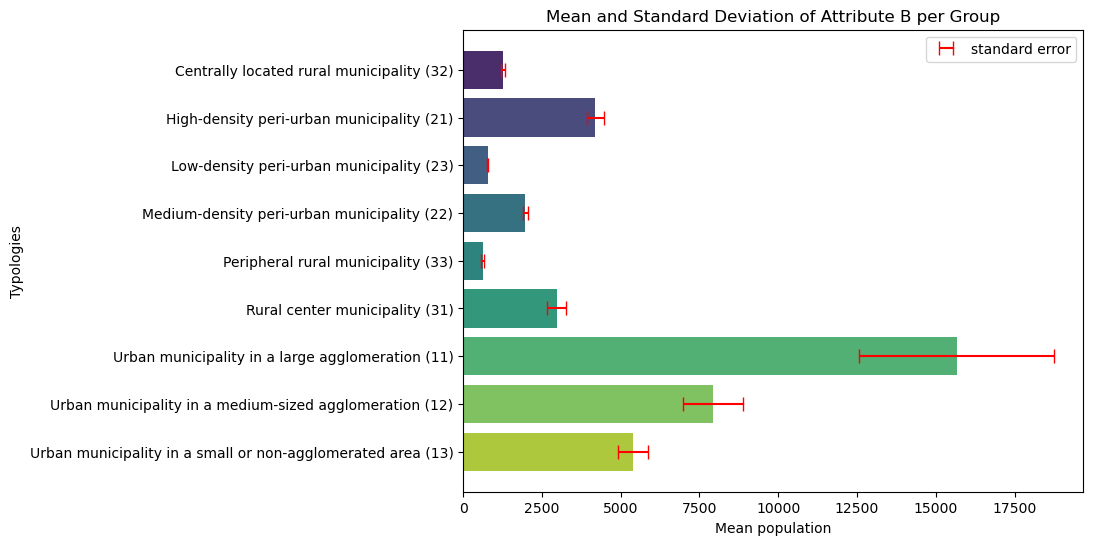

In [9]:
df = Covariates.copy()

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.barplot(y='urban_typo', x='mean', data=grouped_df, palette="viridis", hue='urban_typo', orient="h")

# Add error bars manually
plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.legend()
plt.ylabel('Typologies')

# Show the plot
plt.show()


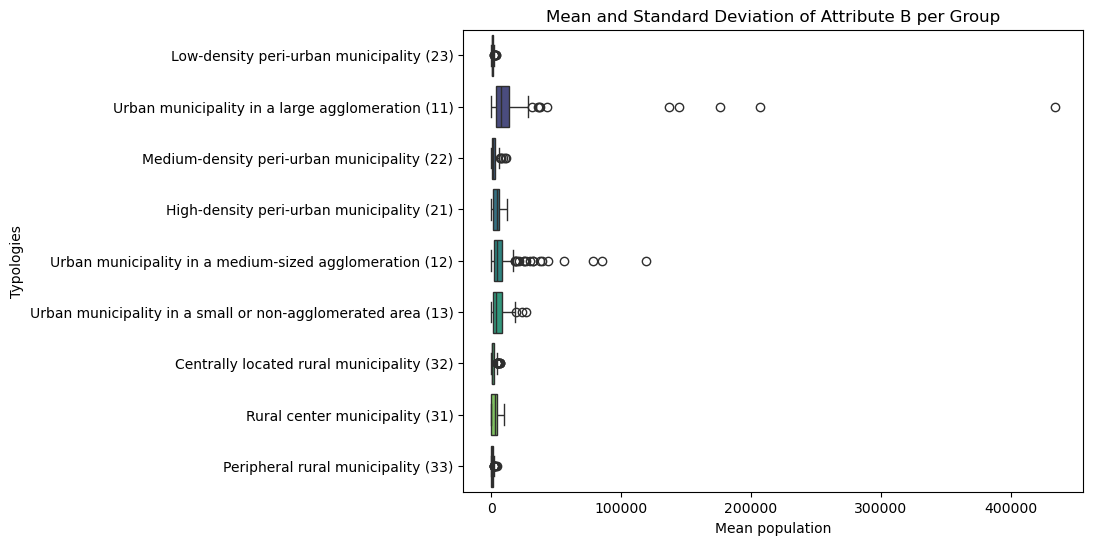

In [11]:
df = Covariates.copy()

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='Population', data=df, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.ylabel('Typologies')

# Show the plot
plt.show()

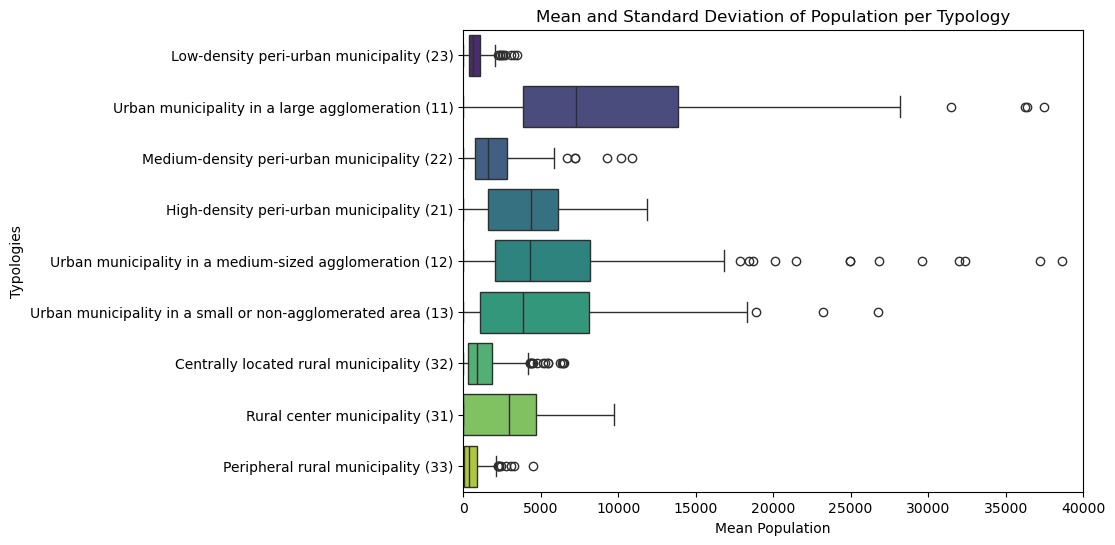

In [13]:
# Calculate Standard Error (SE)
grouped_df['se'] = grouped_df['std'] / grouped_df['count'] ** 0.5

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='urban_typo', x='Population', data=df, palette="viridis", hue='urban_typo')

# Add labels and title
plt.title('Mean and Standard Deviation of Population per Typology')
plt.xlabel('Mean Population')
plt.ylabel('Typologies')
plt.xlim([0, 40000])

# Show the plot
plt.show()

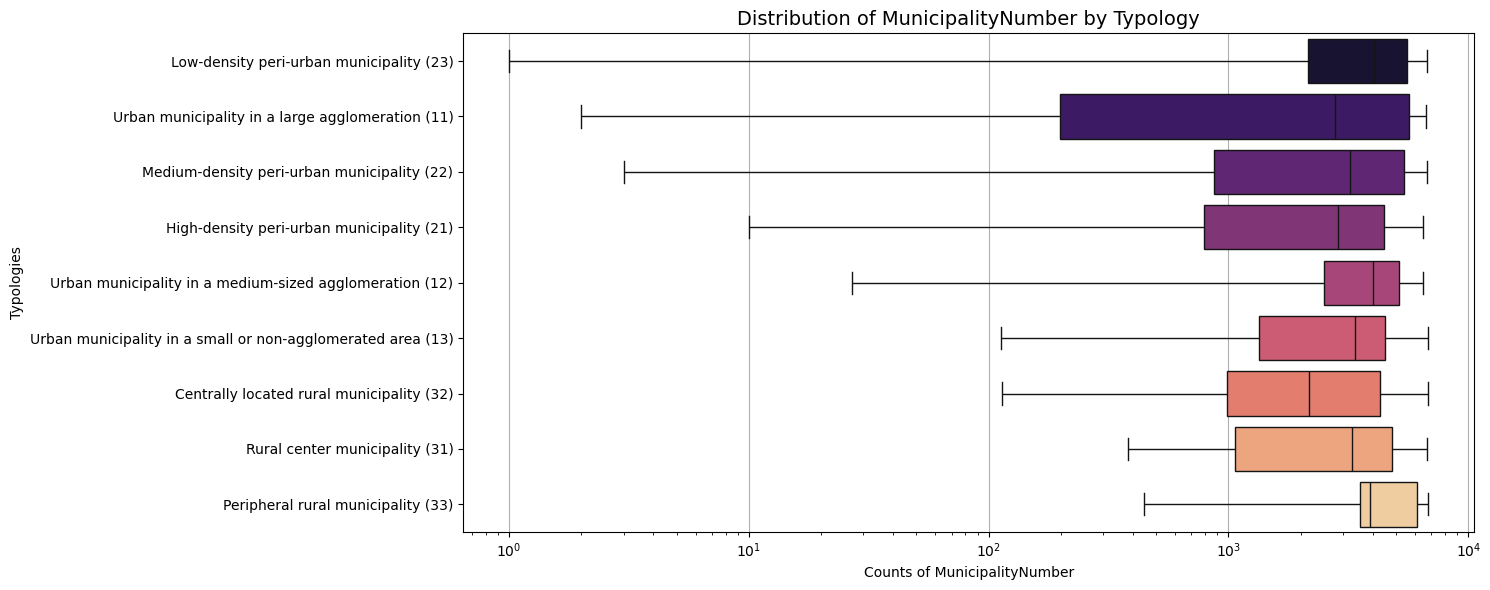

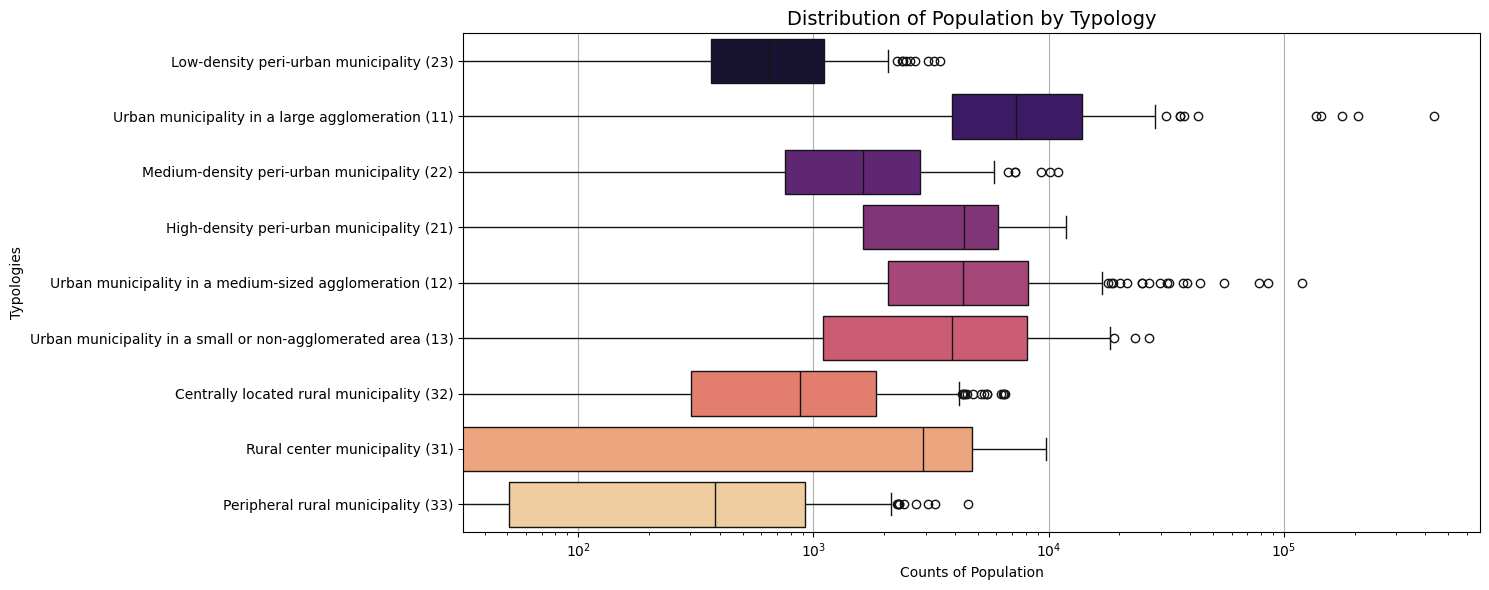

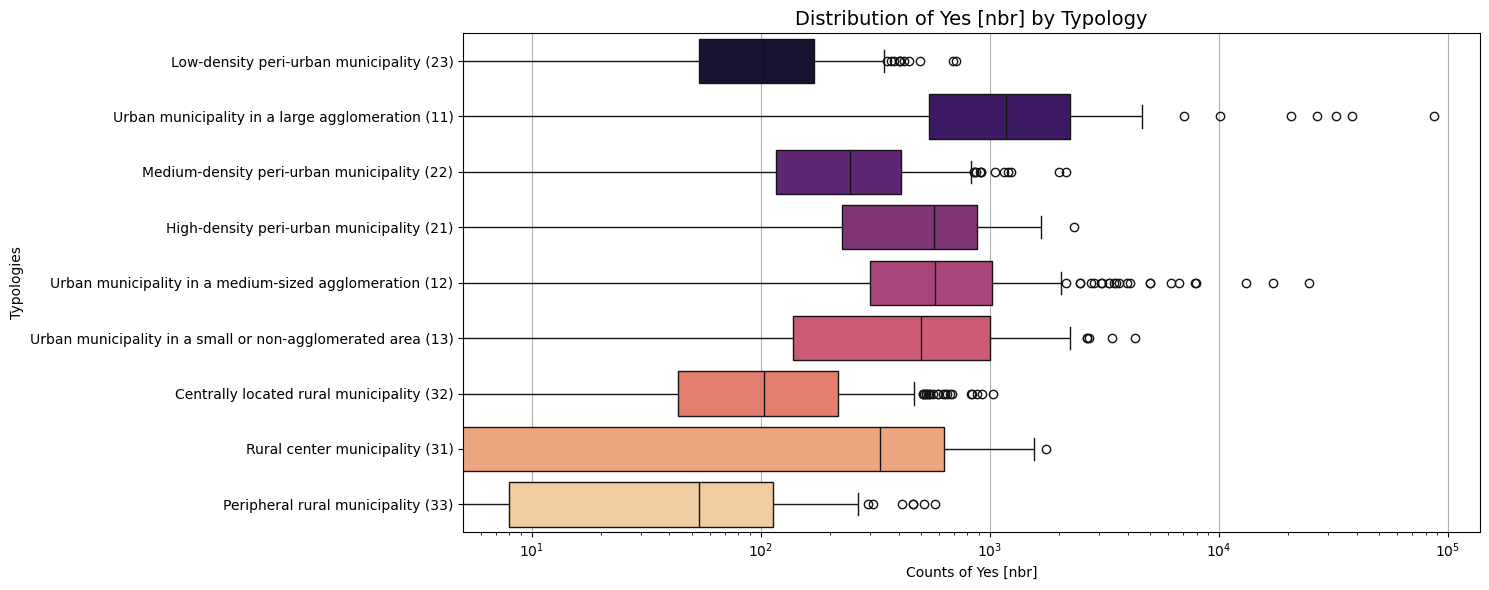

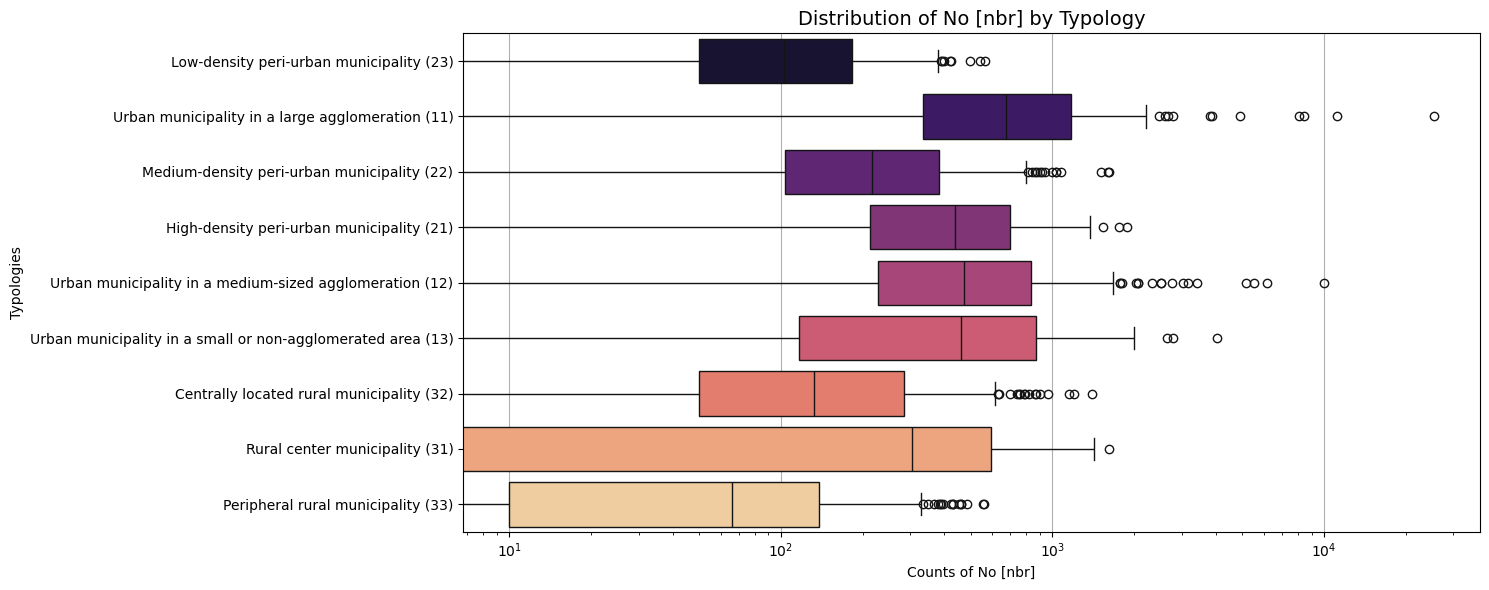

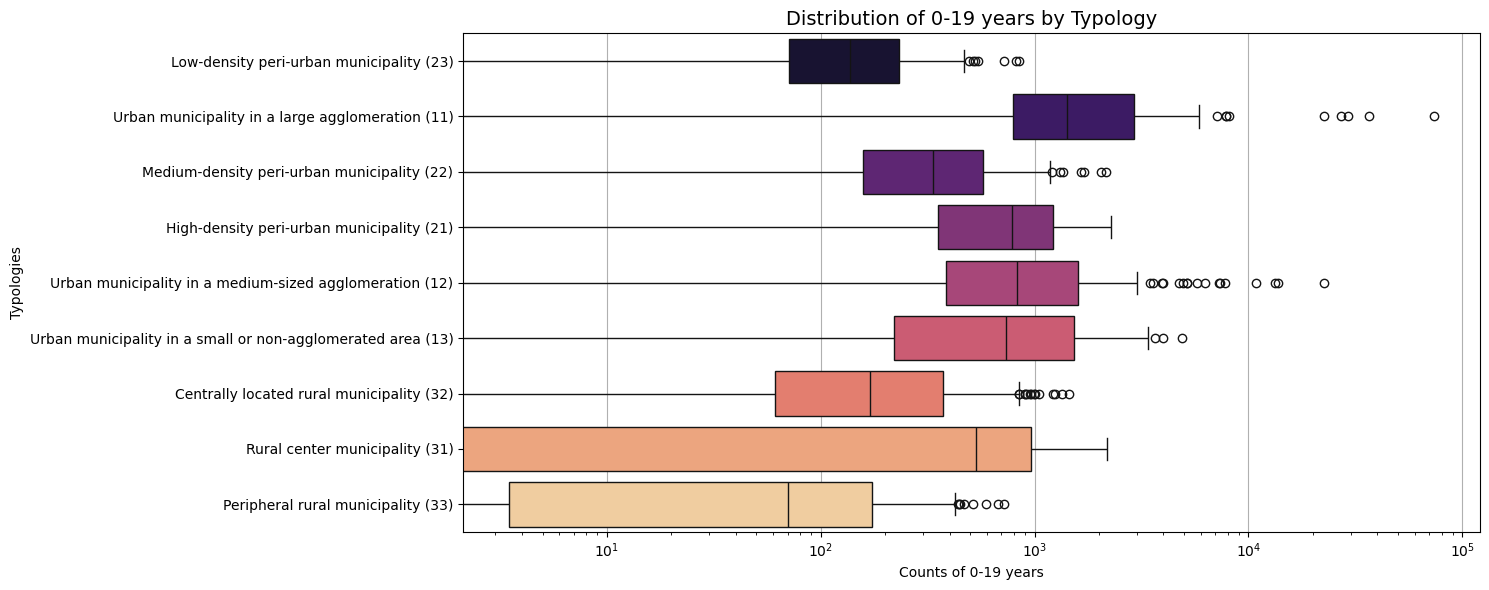

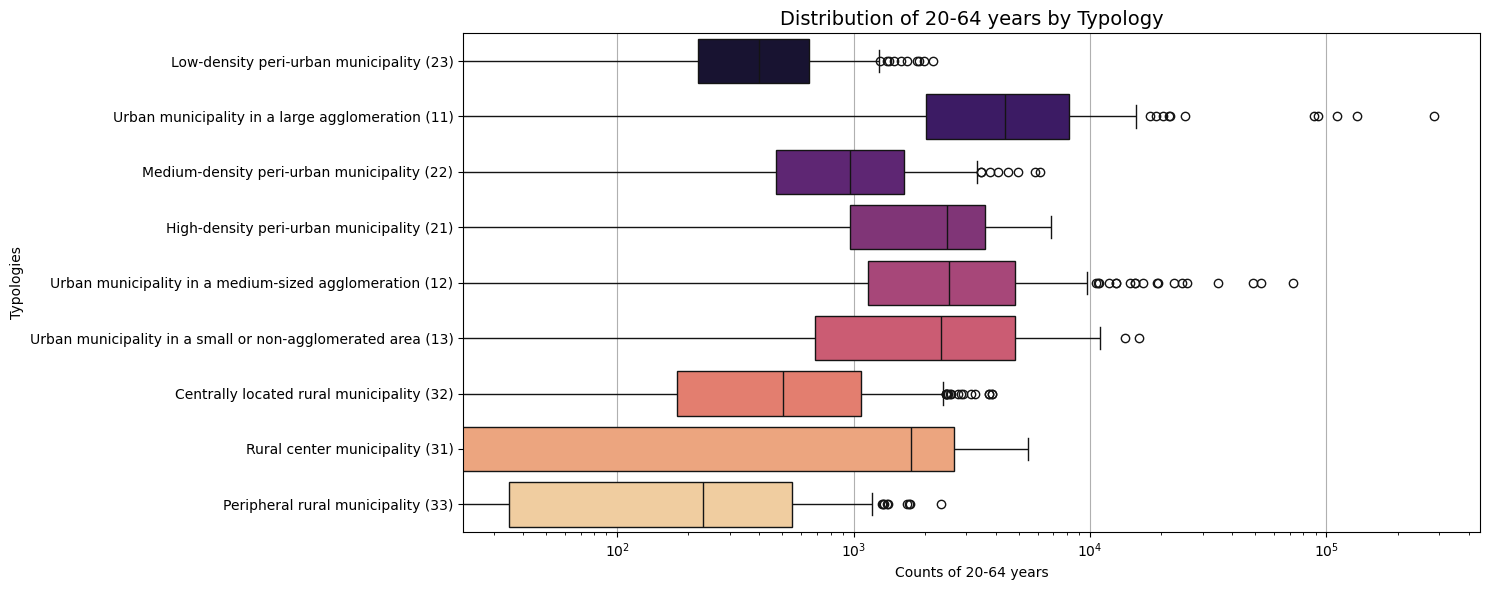

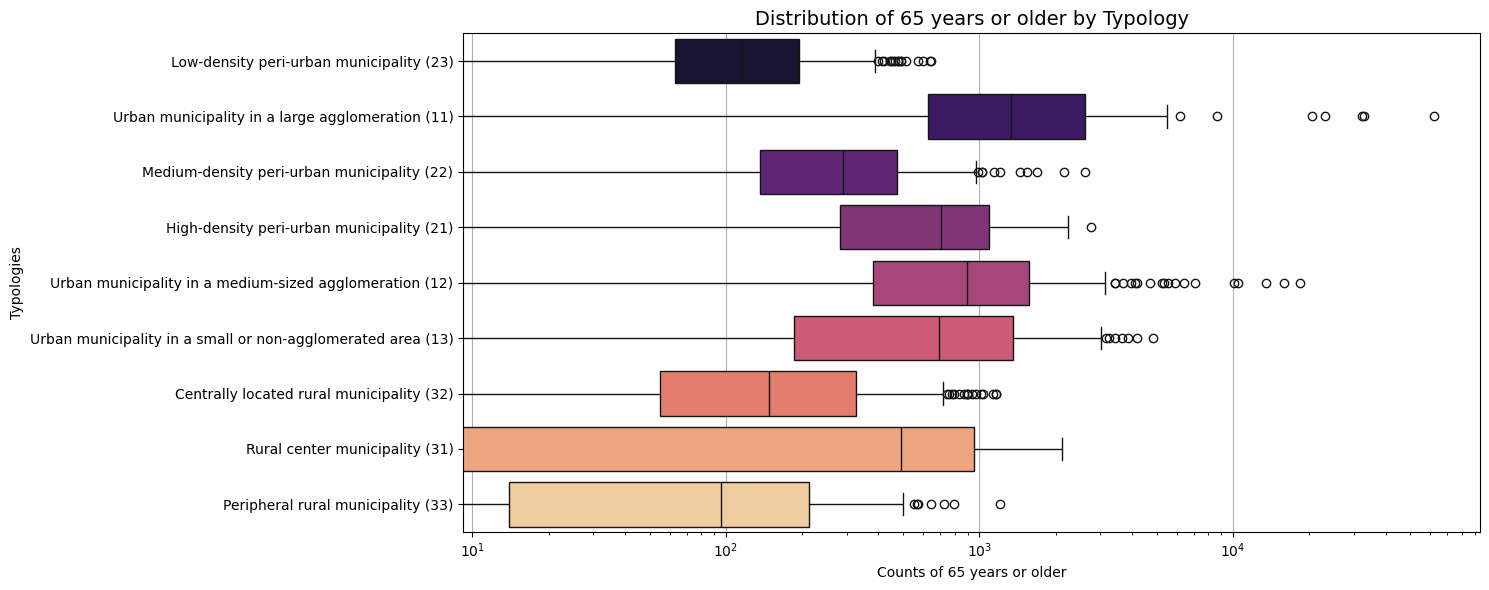

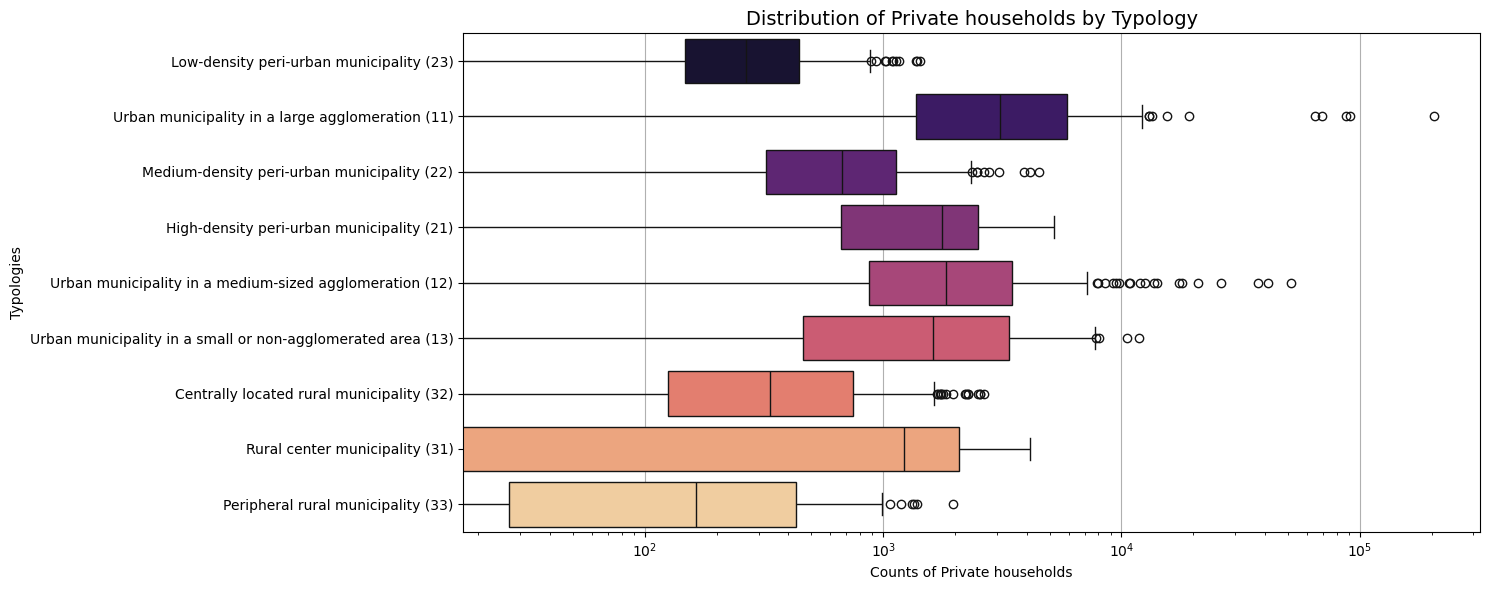

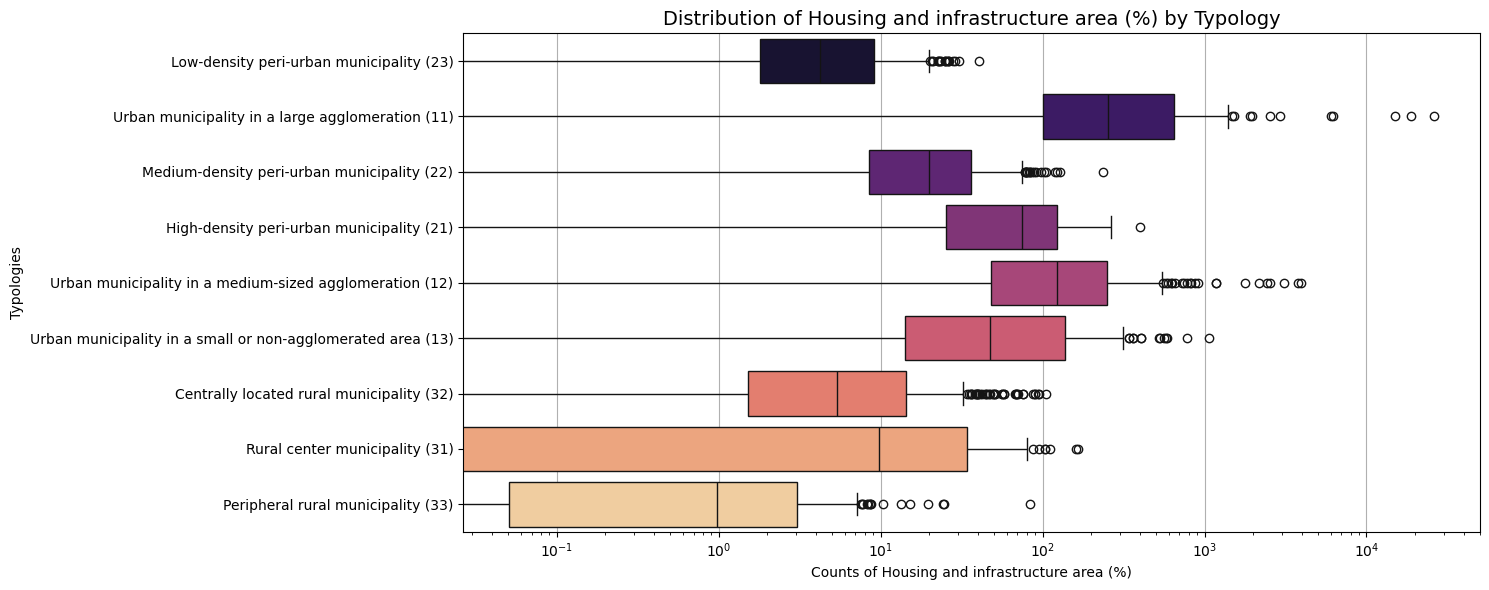

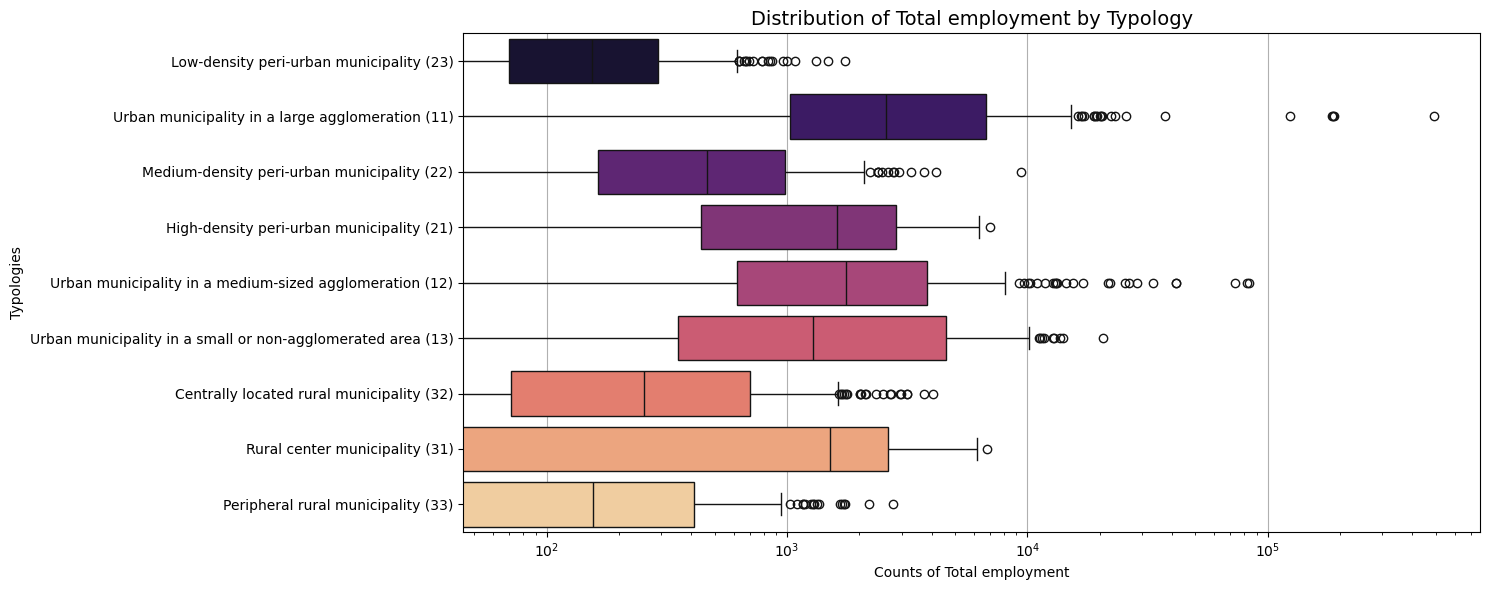

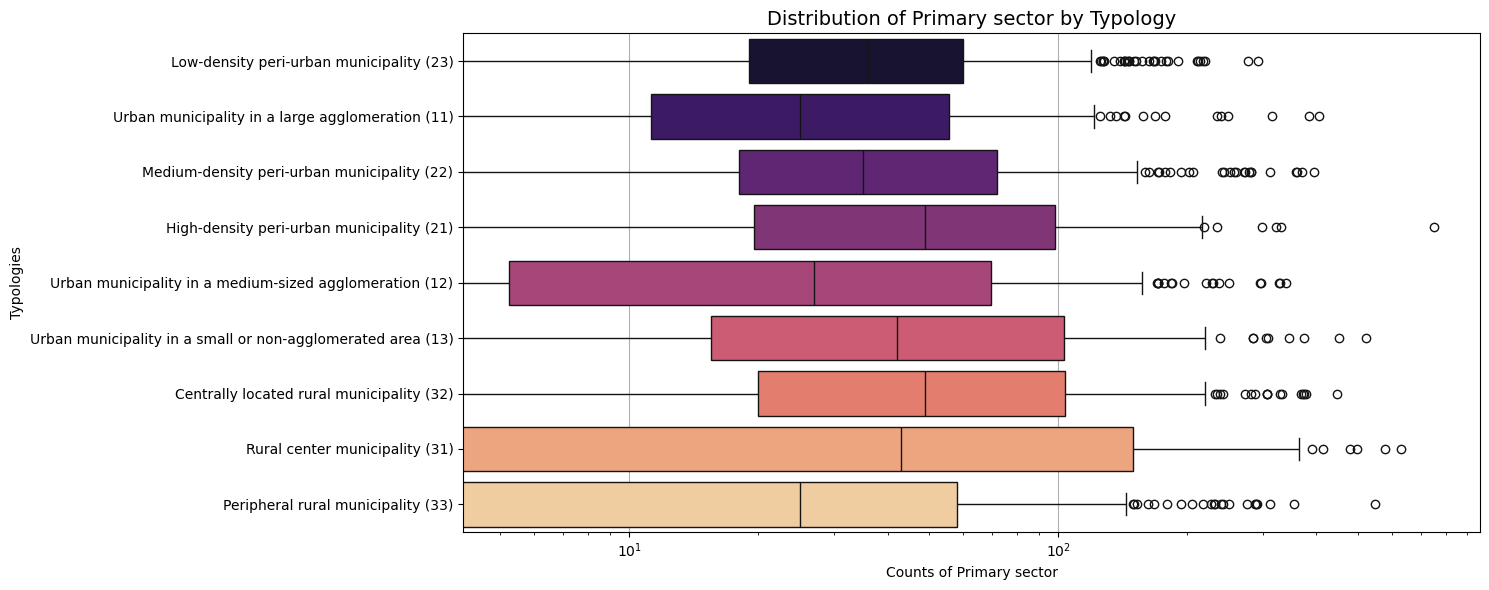

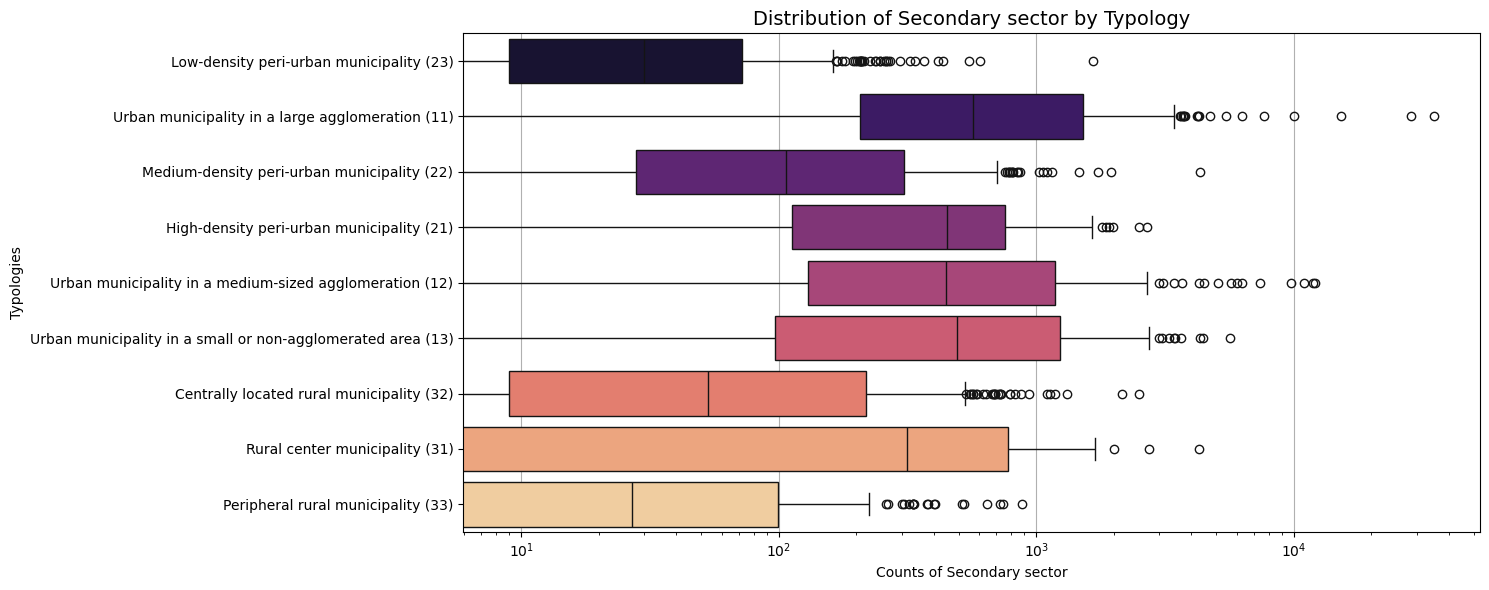

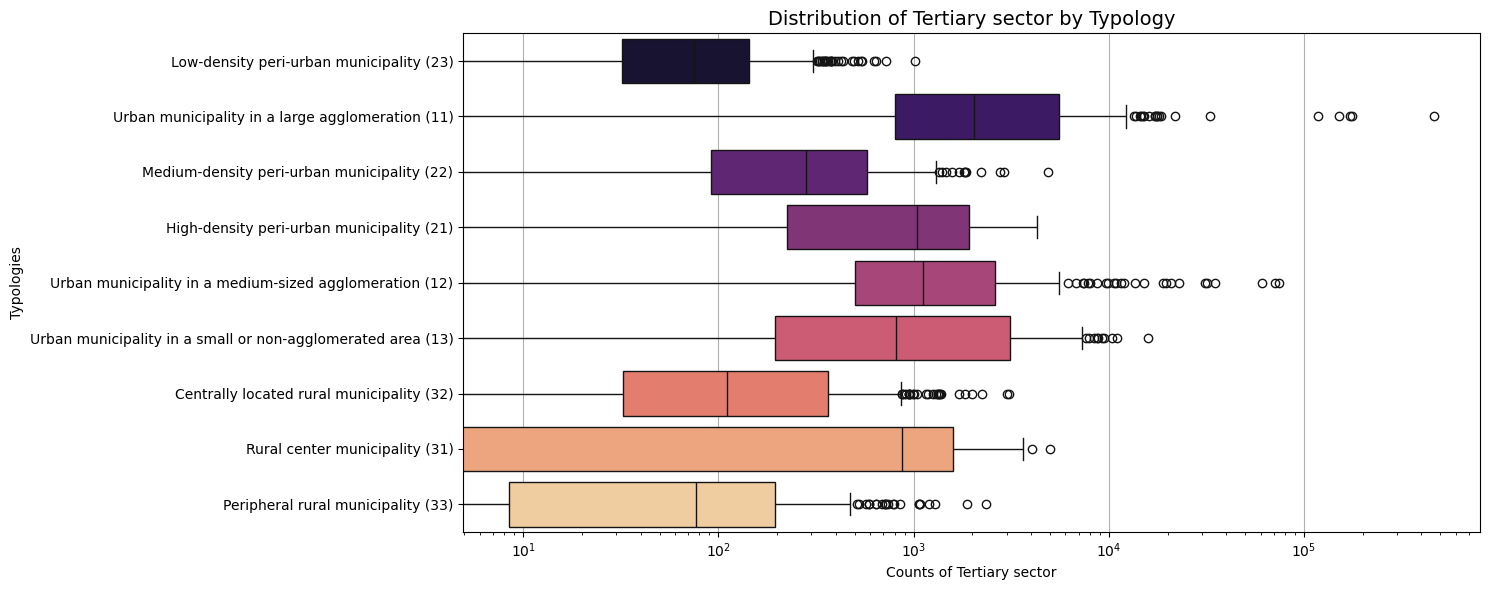

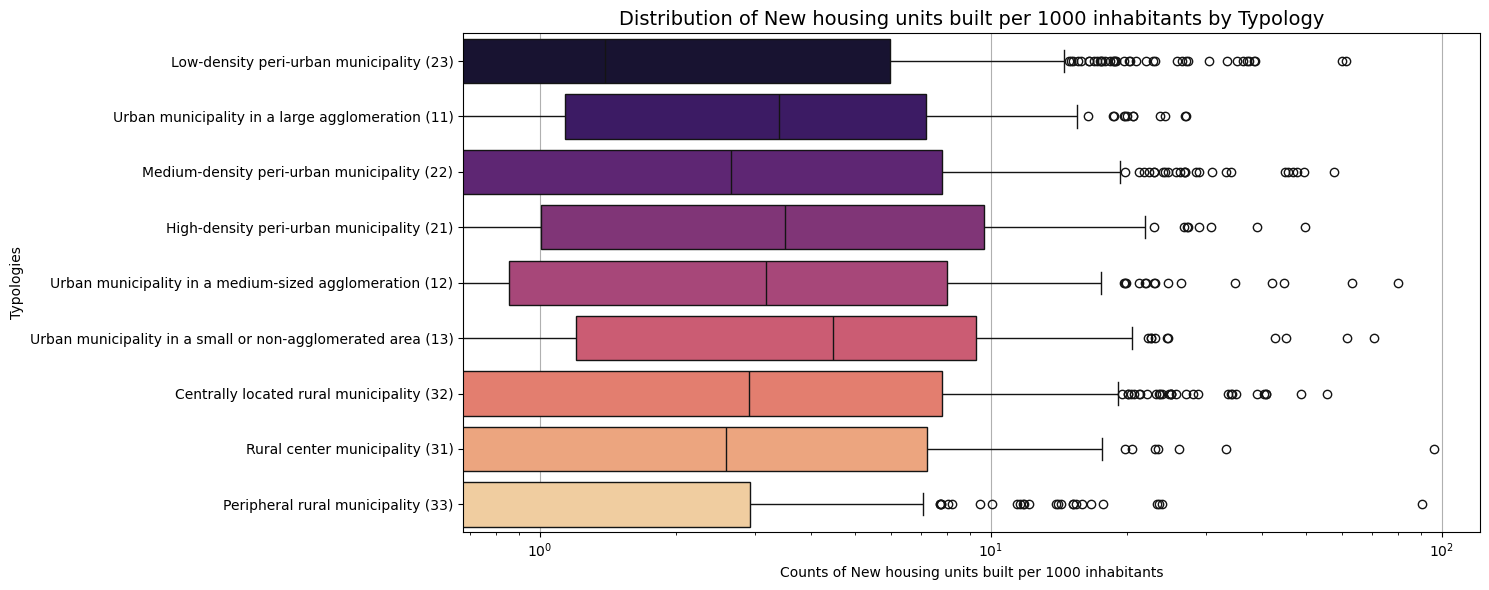

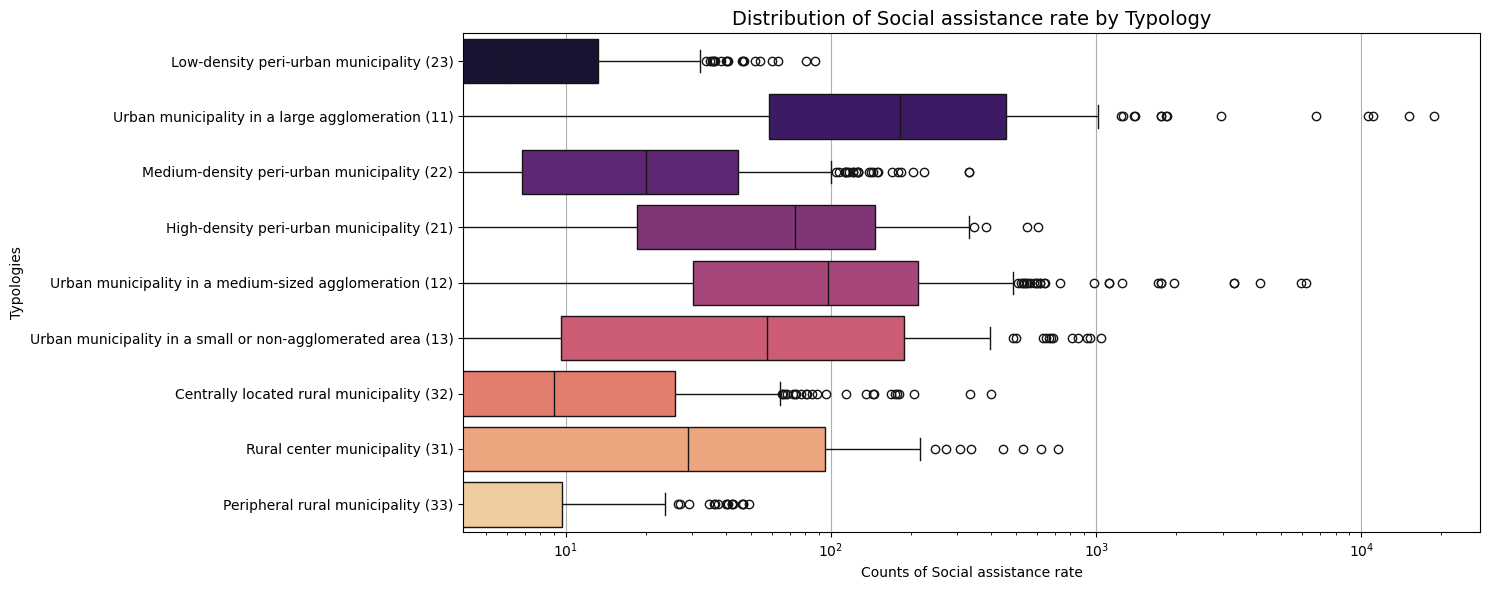

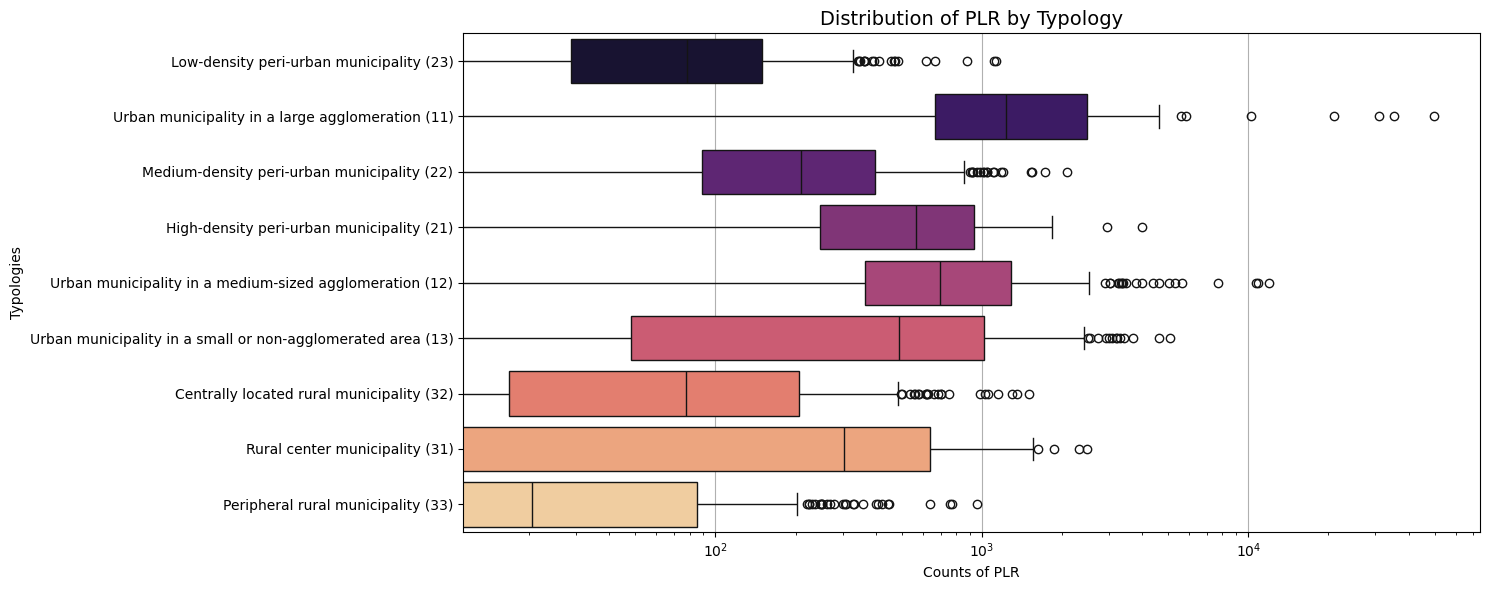

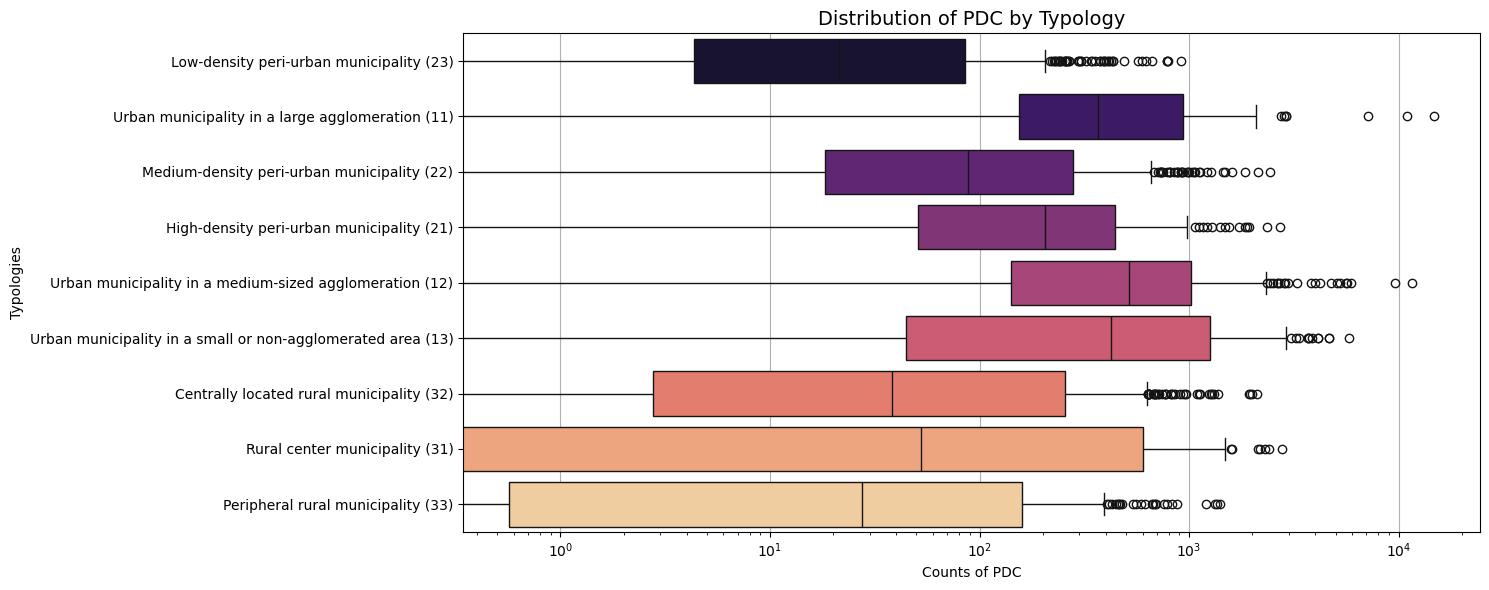

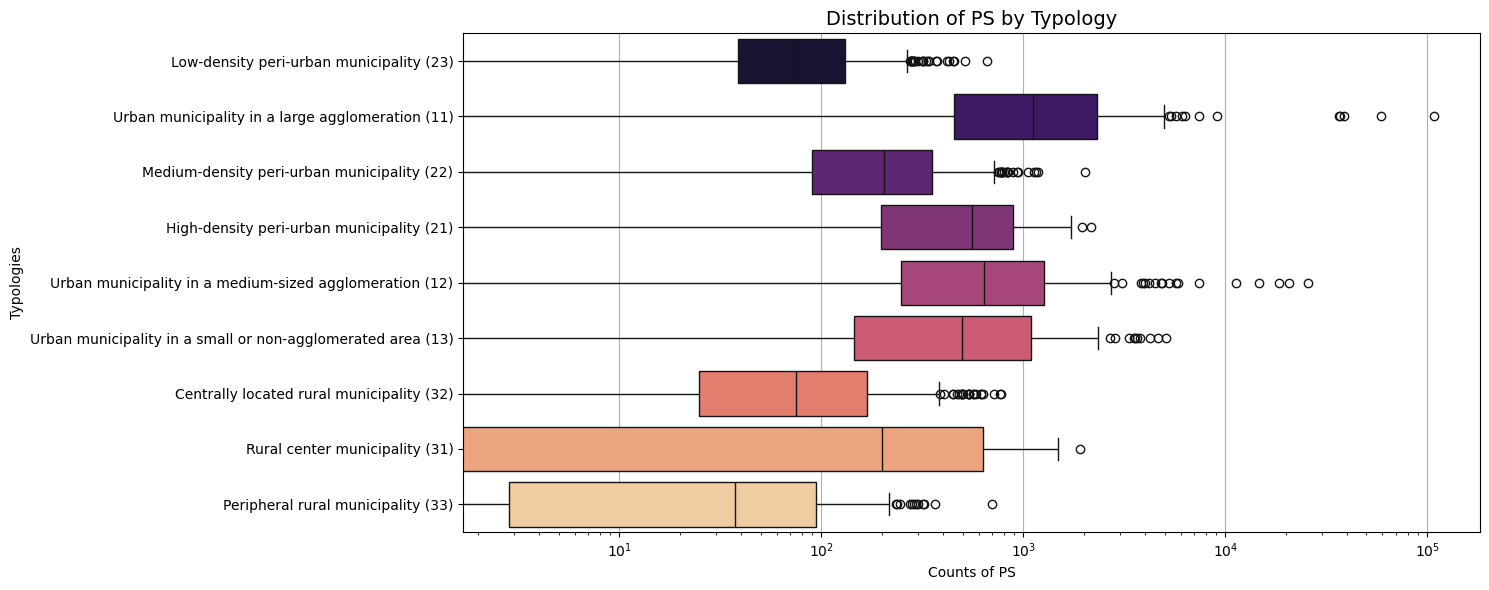

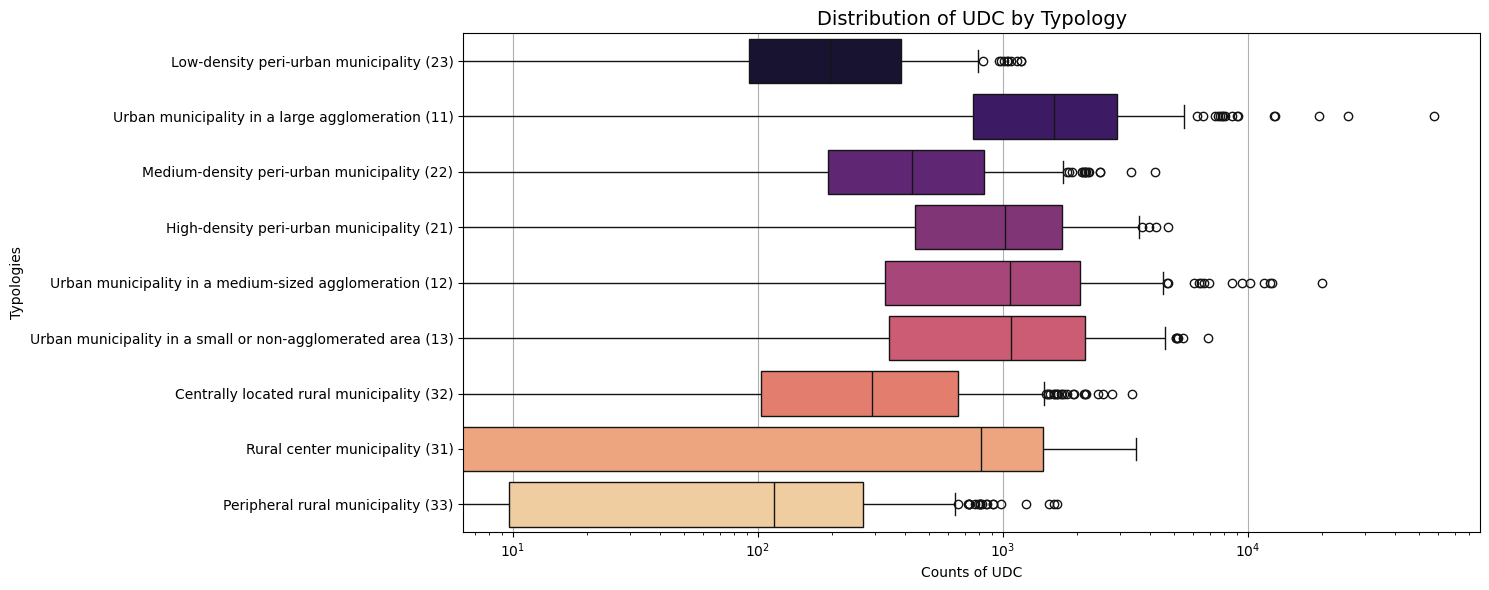

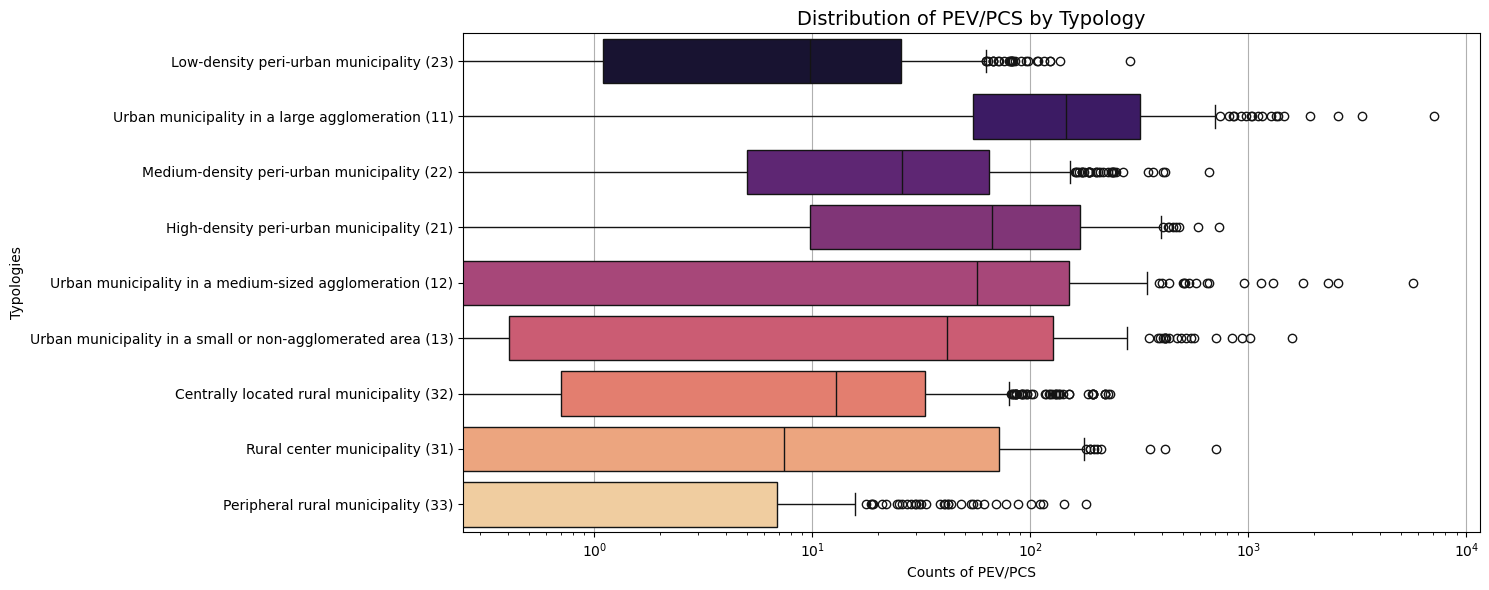

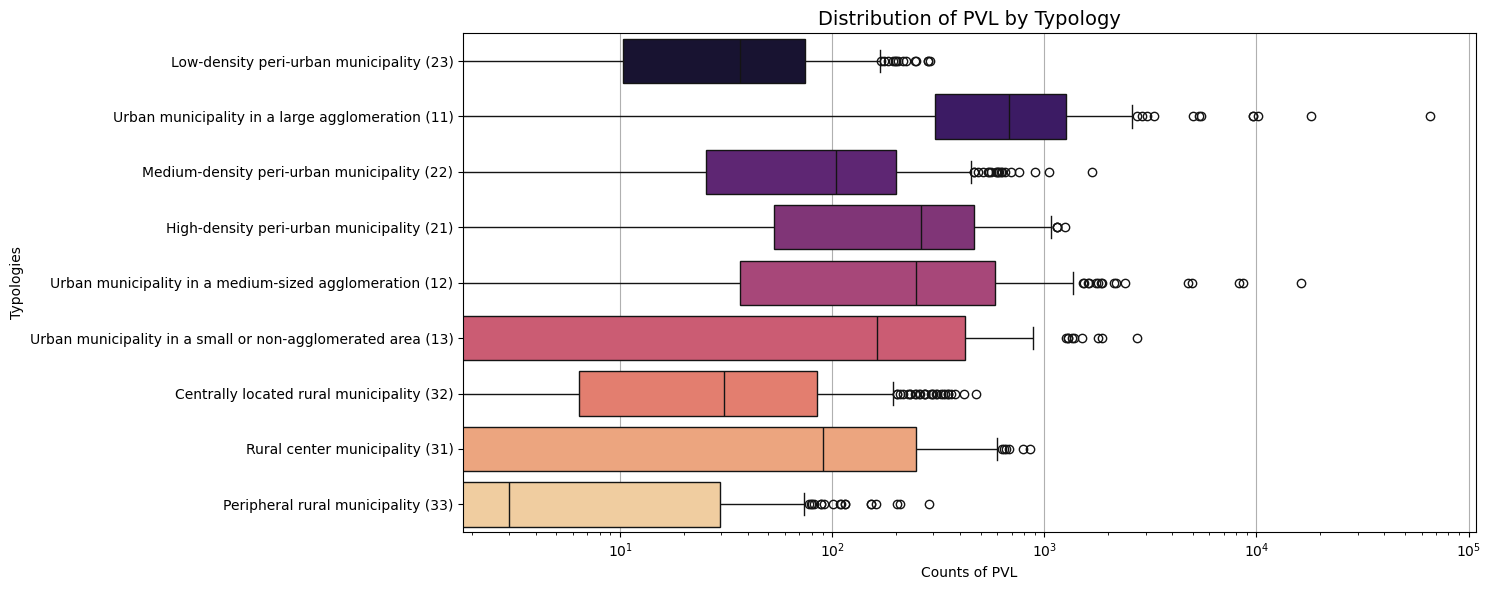

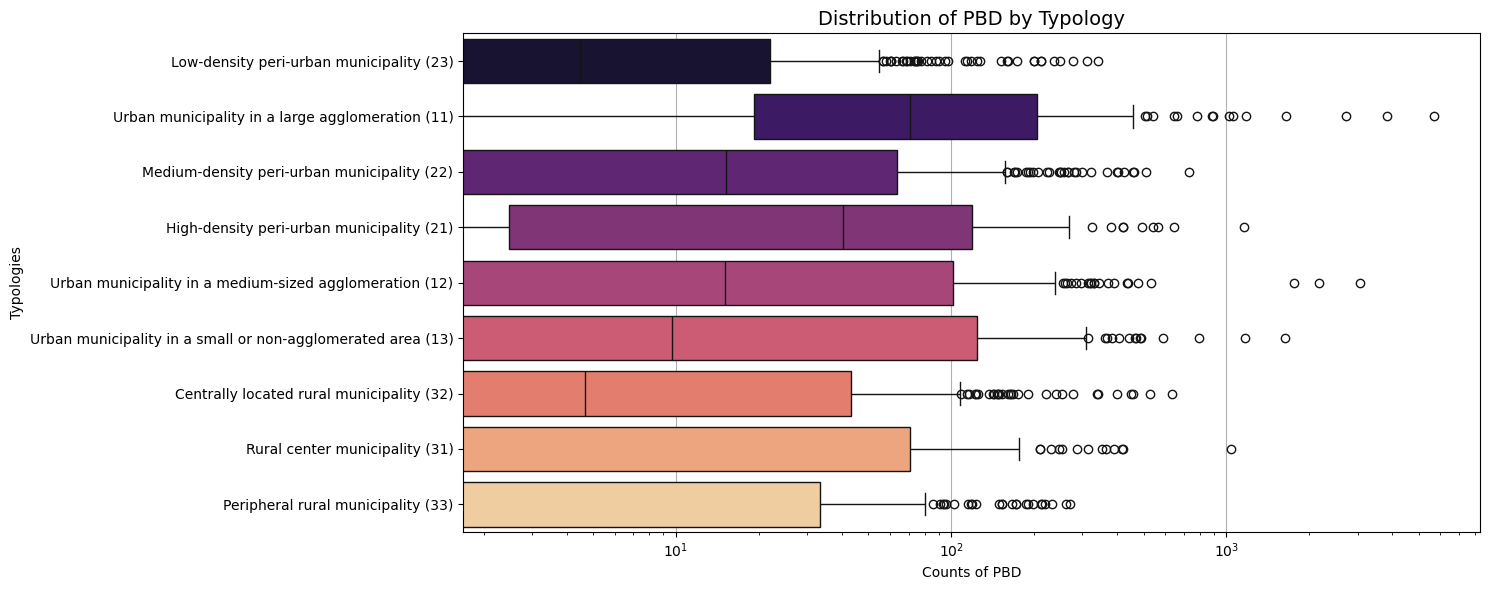

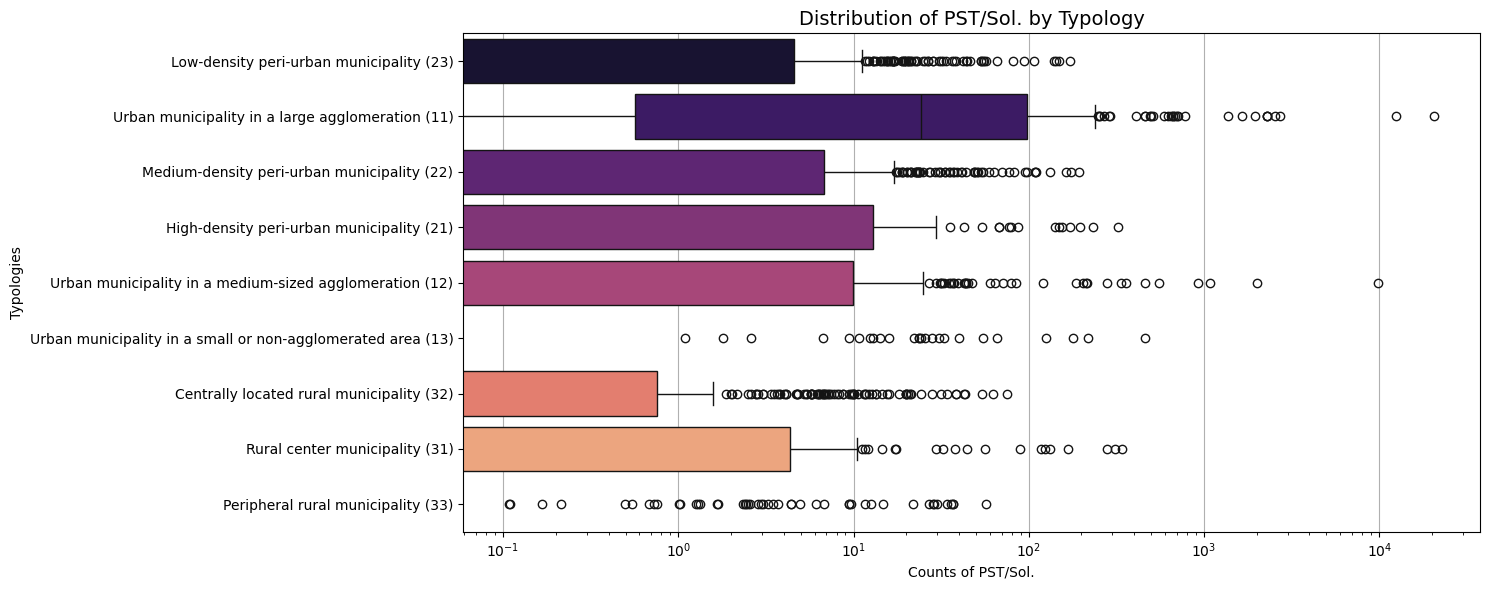

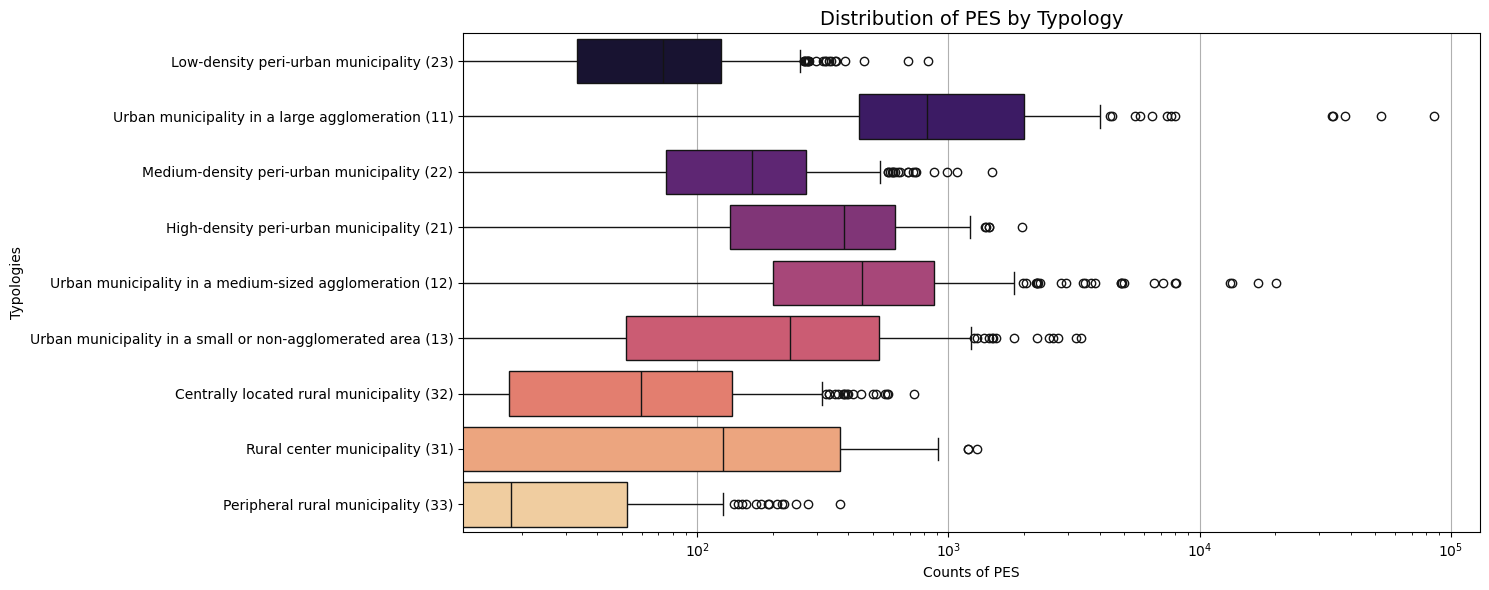

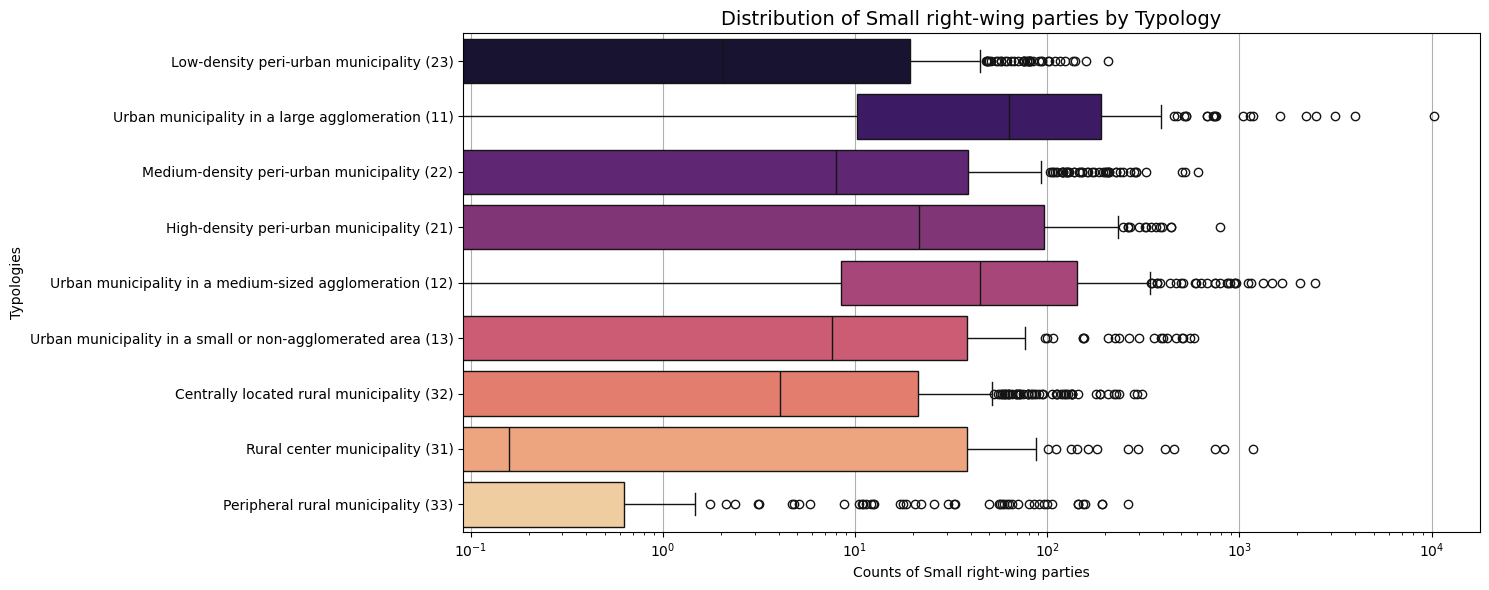

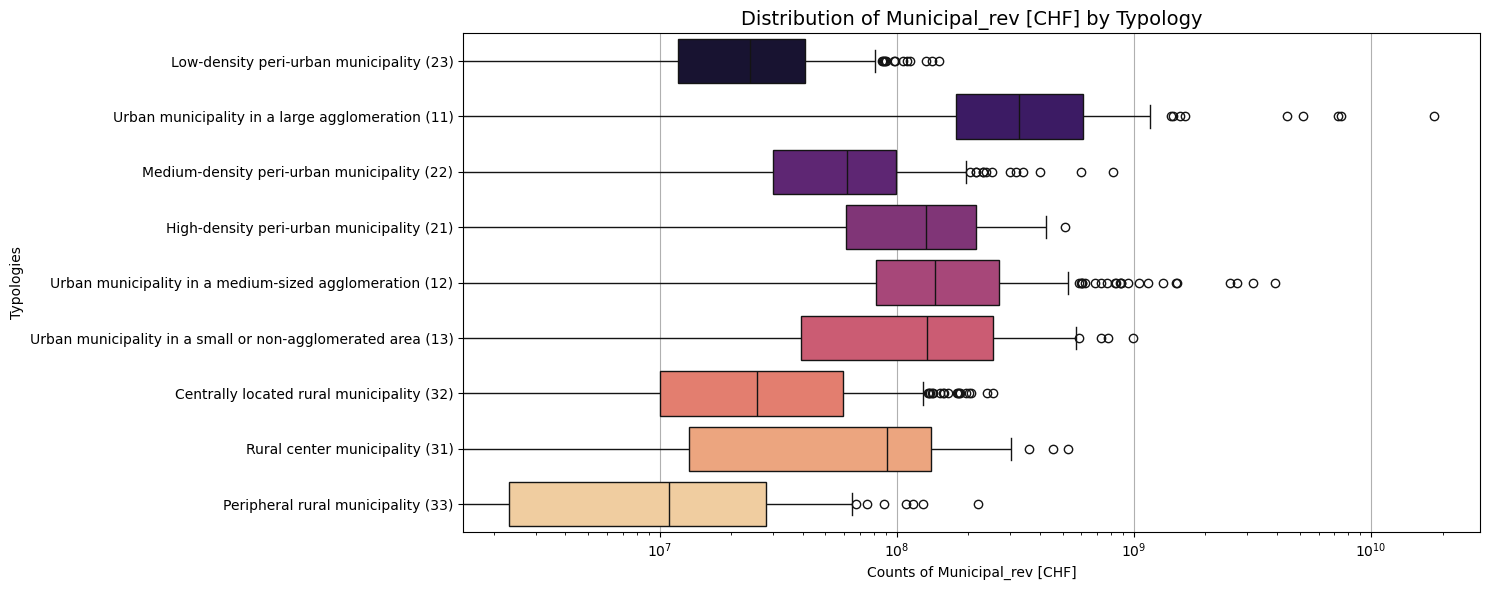

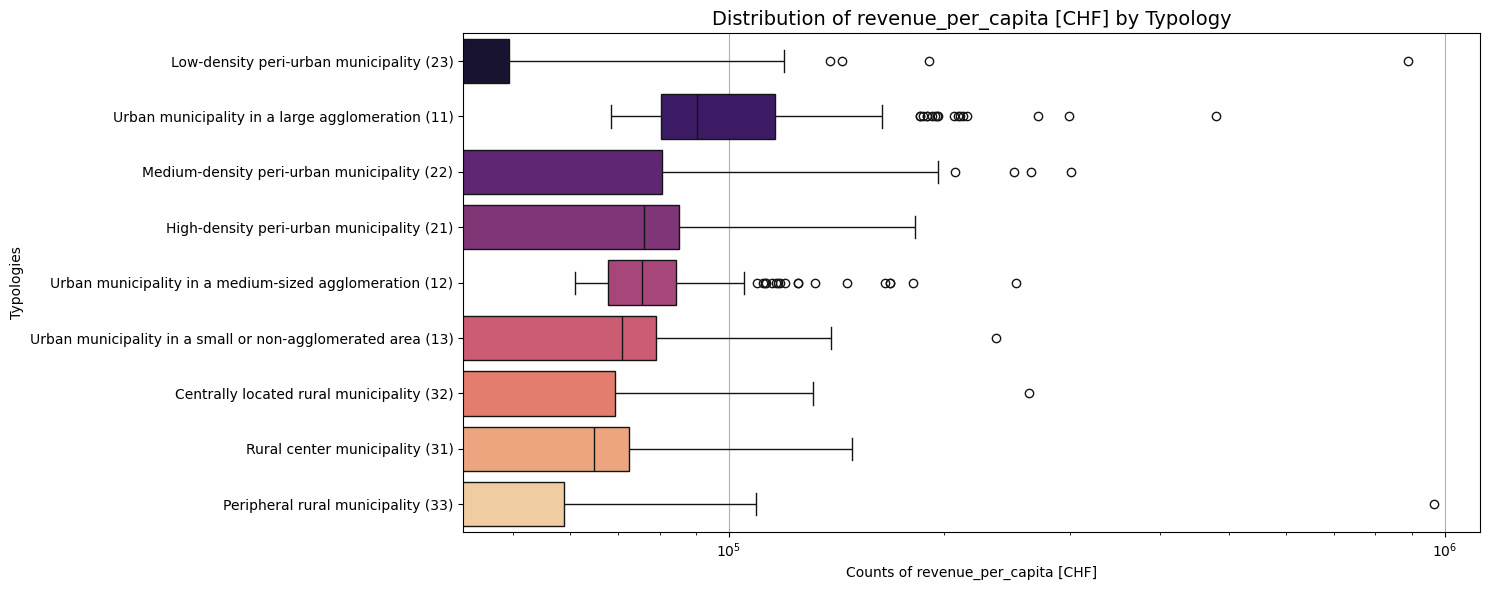

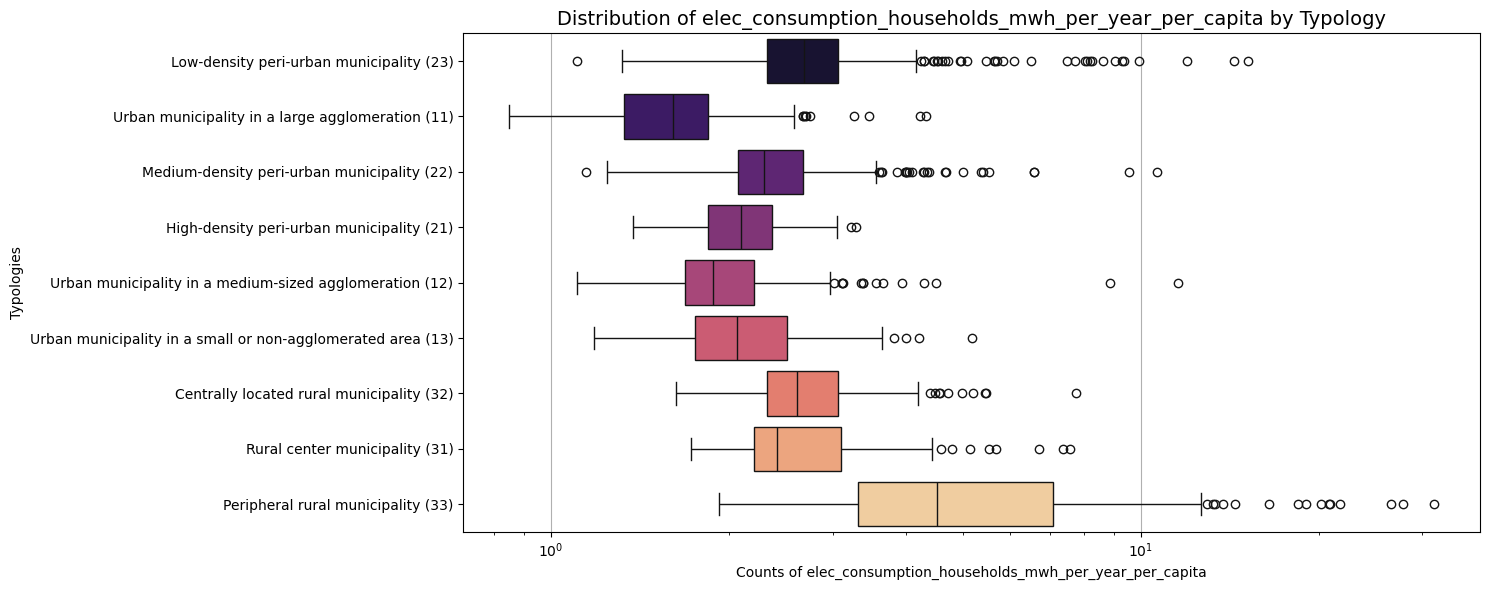

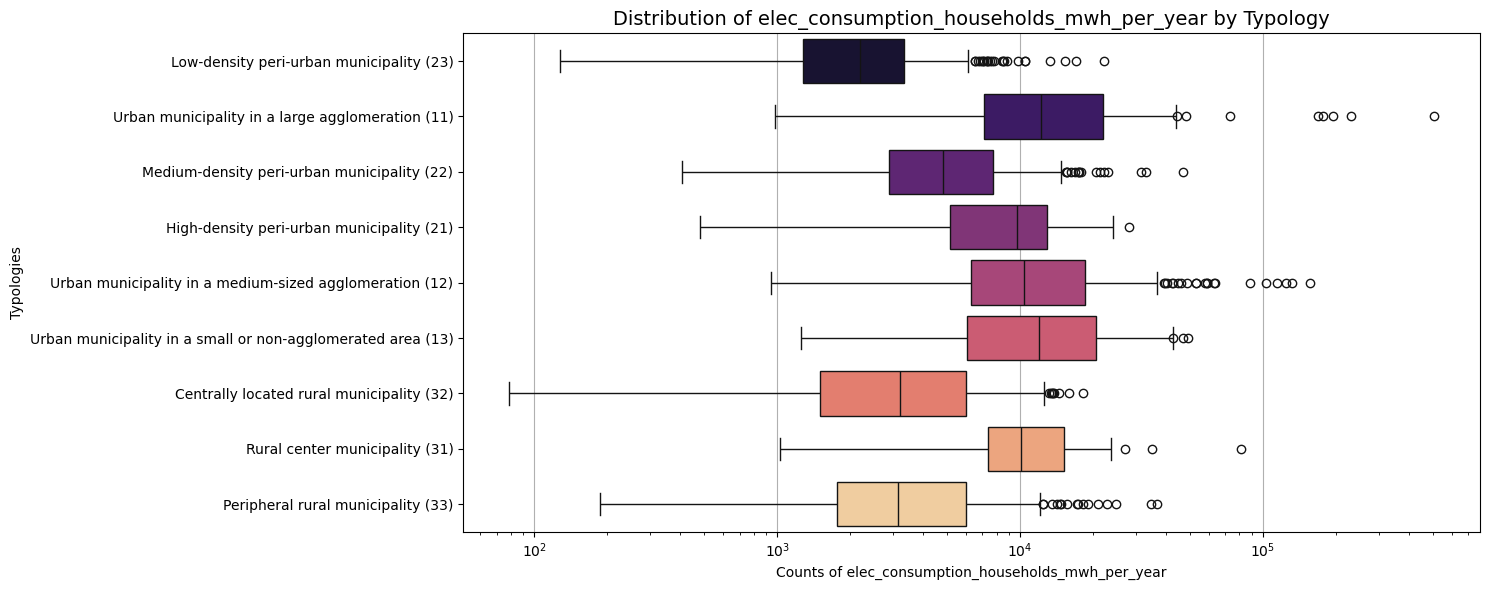

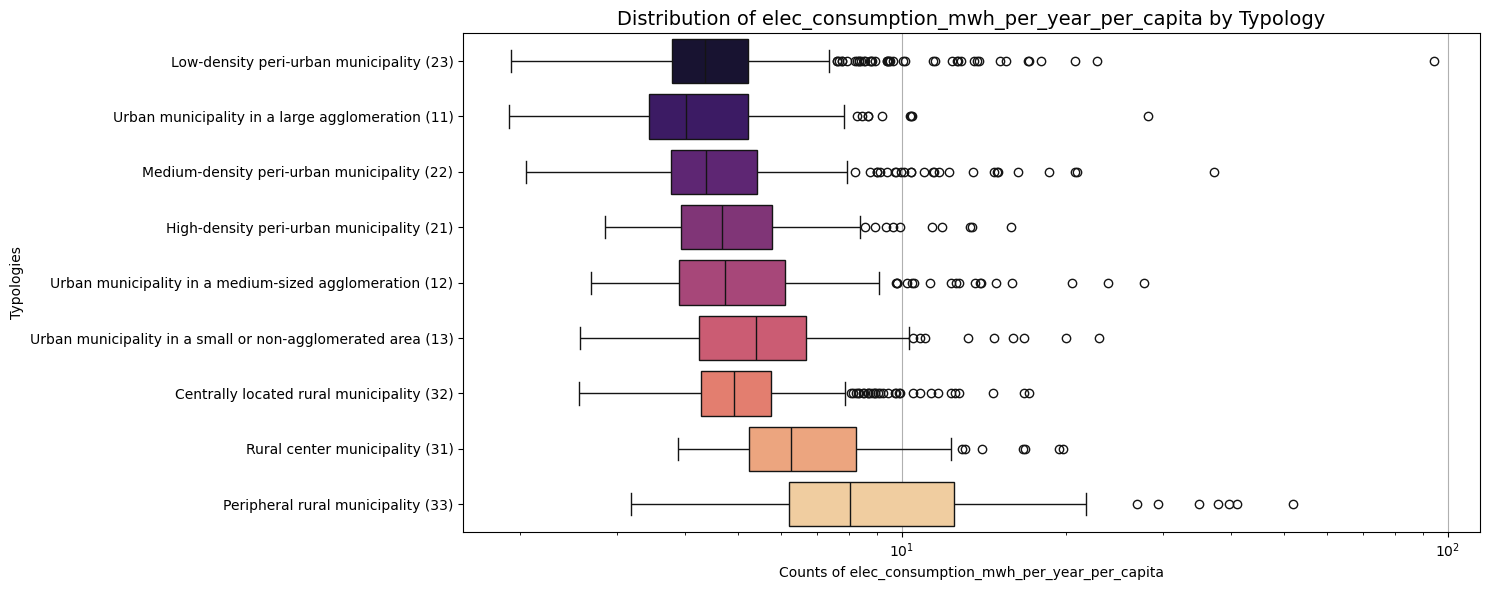

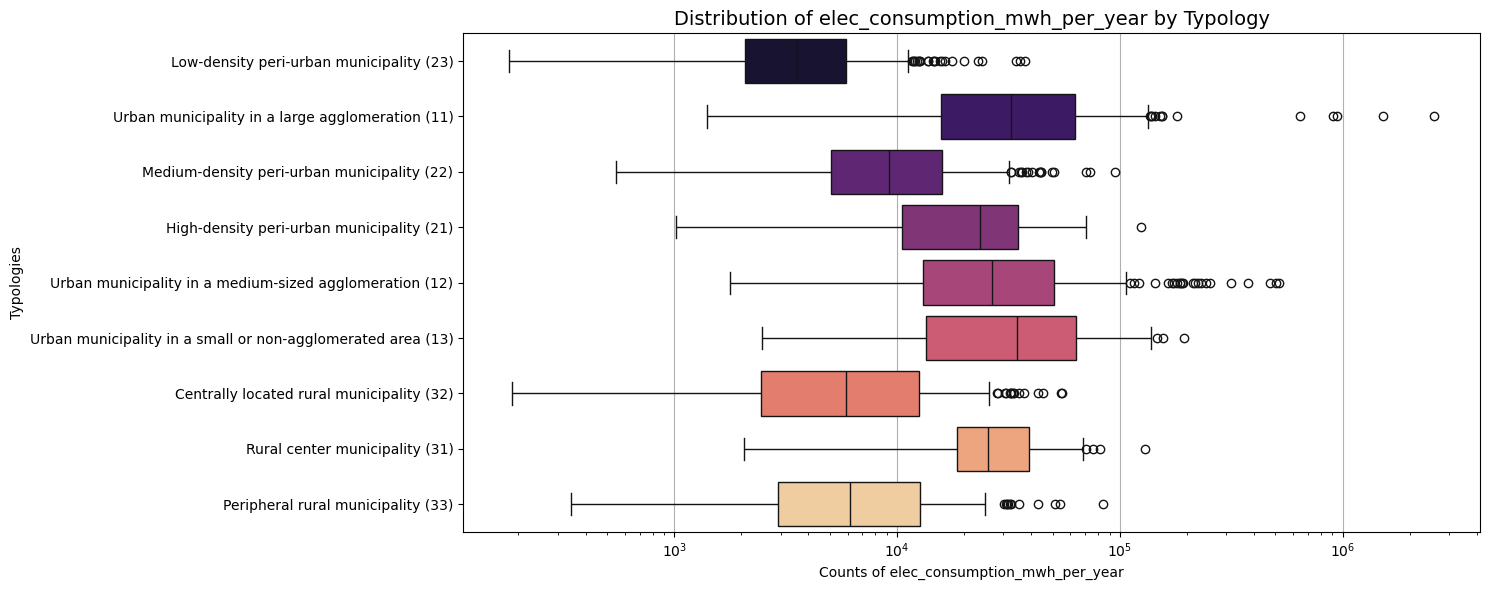

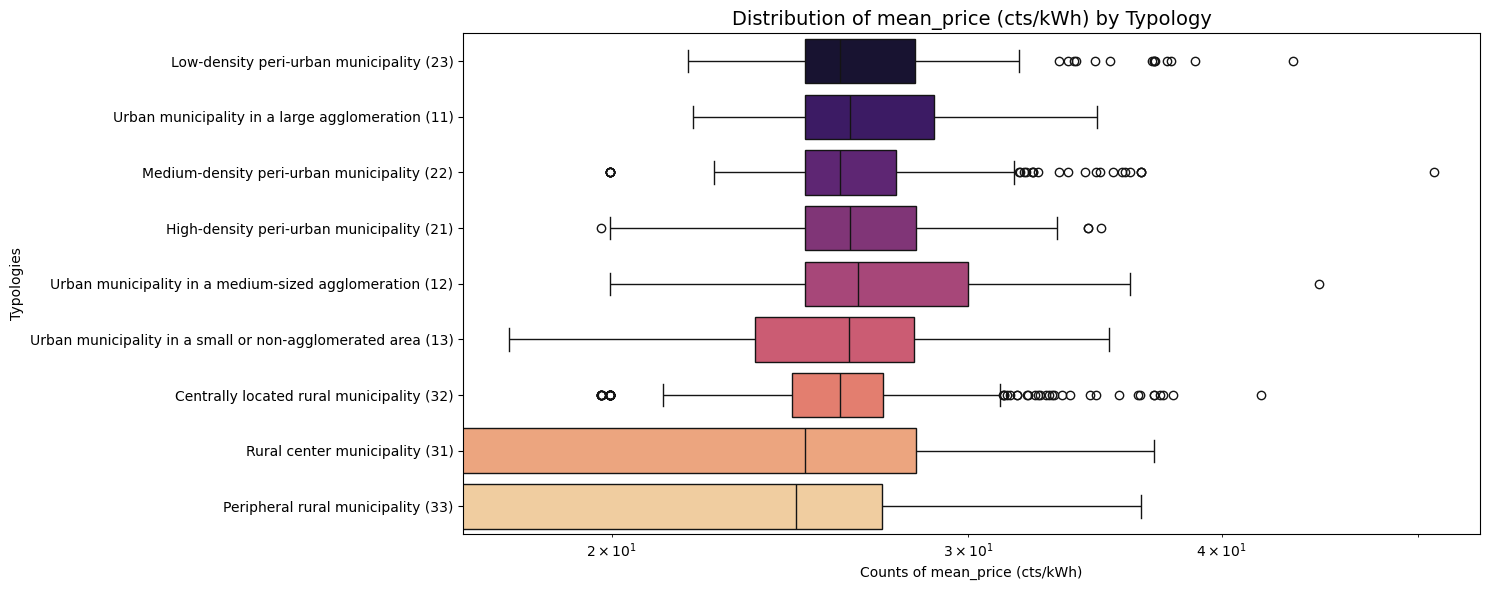

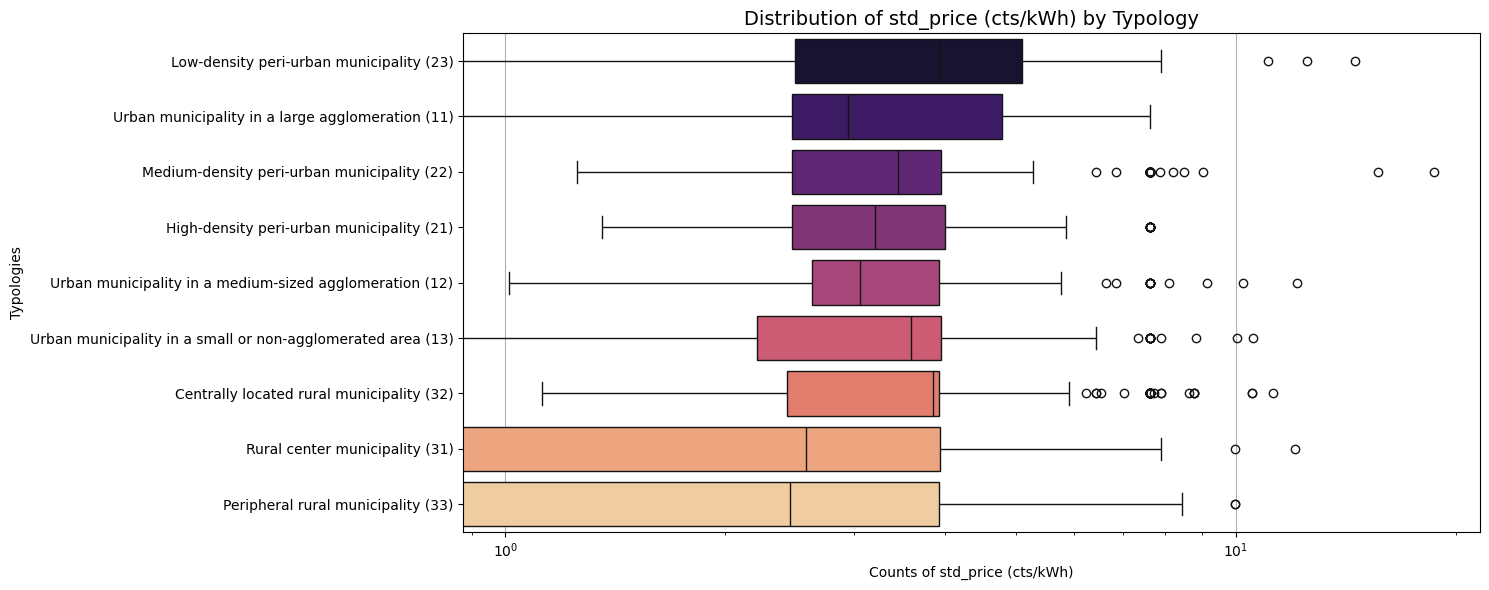

In [15]:
numeric_columns = list(df.select_dtypes(include='number').columns)
len(numeric_columns)

# Assuming `numeric_columns` is a list of column names you want to plot
for j, col in enumerate(numeric_columns):
    # Create a new figure for each variable
    plt.figure(figsize=(15, 6))
    
    # Plot a boxplot for each variable
    sns.boxplot(y='urban_typo', x=col, data=df, palette="magma", hue='urban_typo')
    
    # Set titles and labels
    plt.title(f'Distribution of {col} by Typology', fontsize=14)
    plt.xlabel(f'Counts of {col}')
    plt.ylabel('Typologies')
    #plt.xlim([0, 3*Covariates_final_df[col].quantile(0.95)])

    # Set y-axis to log scale
    #plt.yscale('log')
    
    # Set x-axis to log scale (optional, if you want both axes in log scale)
    plt.xscale('log')
    
    # show grid on x a-axis only
    plt.grid(axis="x")
    
    # Display the plot
    plt.tight_layout()
    plt.show()
